<a href="https://colab.research.google.com/github/Wanderson23/Data_projects/blob/main/Data_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando os dados


In [ ]:
caminho_dados = "/content/drive/MyDrive/Colab Notebooks/AD/2024_Viagem.csv"

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

#Lendo os dados
df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";", decimal=",")

#Criando nova coluna de despesas
#df_viagens['Despesas'] =df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

#Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

#Convertendo colunas de datas
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format = "%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format = "%d/%m/%Y")

#Criando novas colunas de datas
df_viagens['Mês da viagem'] = df_viagens["Período - Data de início"].dt.month_name()
#Criando nova coluna com a quantidade de dias de viagem
df_viagens['Dias de viagem'] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days



In [ ]:
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773090 entries, 0 to 773089
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Identificador do processo de viagem  773090 non-null  int64         
 1   Número da Proposta (PCDP)            773090 non-null  object        
 2   Situação                             773090 non-null  object        
 3   Viagem Urgente                       773090 non-null  object        
 4   Justificativa Urgência Viagem        772868 non-null  object        
 5   Código do órgão superior             773090 non-null  int64         
 6   Nome do órgão superior               773090 non-null  object        
 7   Código órgão solicitante             773090 non-null  int64         
 8   Nome órgão solicitante               773090 non-null  object        
 9   CPF viajante                         647751 non-null  object        
 

Convertendo o formato dos valores


In [ ]:
df_viagens['Valor diárias']

,Valor diárias
0,929.18
1,0.00
2,0.00
3,0.00
4,14176.38
...,...
773085,1109.09
773086,262.05
773087,1204.09
773088,0.00


In [ ]:
df_viagens['Valor passagens'] = df_viagens['Valor passagens'].str.replace(',', '.').astype(float)
df_viagens['Valor devolução'] = df_viagens['Valor devolução'].str.replace(',', '.').astype(float)
df_viagens['Valor outros gastos'] = df_viagens['Valor outros gastos'].str.replace(',', '.').astype(float)

AttributeError: Can only use .str accessor with string values!

Verificando a mudança


In [ ]:
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773090 entries, 0 to 773089
Data columns (total 24 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Identificador do processo de viagem  773090 non-null  int64         
 1   Número da Proposta (PCDP)            773090 non-null  object        
 2   Situação                             773090 non-null  object        
 3   Viagem Urgente                       773090 non-null  object        
 4   Justificativa Urgência Viagem        772868 non-null  object        
 5   Código do órgão superior             773090 non-null  int64         
 6   Nome do órgão superior               773090 non-null  object        
 7   Código órgão solicitante             773090 non-null  int64         
 8   Nome órgão solicitante               773090 non-null  object        
 9   CPF viajante                         647751 non-null  object        
 

Agora sim é possivel somar as colunas


In [ ]:
df_viagens["Valor diárias"] + df_viagens["Valor passagens"]

,0
0,929.18
1,0.00
2,0.00
3,0.00
4,21068.69
...,...
773085,4289.15
773086,262.05
773087,5248.78
773088,5562.82


Criando coluna Despesas

In [ ]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Mês da viagem,Dias de viagem,Despesas
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,Instituto Federal do Acre,***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.0,0.0,February,2,929.18
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.0,0.0,January,8,21068.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773085,2024001906,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.759.868-**,PAULO PICCHETTI,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-18,2024-12-19,Sem informação,Cumprir agenda de trabalho em Brasília.,1109.09,3180.06,0.0,0.0,December,1,4289.15
773086,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.0,0.0,December,0,262.05
773087,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.0,0.0,December,1,5248.78
773088,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.0,0.0,December,2,5562.82


Agrupando por cargos


In [ ]:
df_viagens ['Cargo'].value_counts()

,count
Cargo,
NÃO IDENTIFICADO,295703
Informações protegidas por sigilo,117220
PROFESSOR DO MAGISTERIO SUPERIOR,50175
PROFESSOR ENS BASICO TECN TECNOLOGICO,33856
CONTRATADO LEI 8745/93 - NI,17194
...,...
TECNICO ESP SERV ECONOM,1
LANCHEIRO,1
AAD-OPERADOR DE MICROCOMPUTADOR,1


In [ ]:
(df_viagens['Cargo'].value_counts(normalize=True) * 100).rename('Proporção de viagens').reset_index()

,Cargo,Proporção de viagens
0,NÃO IDENTIFICADO,38.249492
1,Informações protegidas por sigilo,15.162530
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.490189
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.379309
4,CONTRATADO LEI 8745/93 - NI,2.224062
...,...,...
847,TECNICO ESP SERV ECONOM,0.000129
848,LANCHEIRO,0.000129
849,AAD-OPERADOR DE MICROCOMPUTADOR,0.000129
850,TECNICO DE ENFERMAGEM III,0.000129


In [ ]:
df_viagens.groupby('Cargo')['Despesas'].sum().reset_index()

,Cargo,Despesas
0,AAD - AUXILIAR DE RECURSOS HUMANOS,265.09
1,AAD-AUX DE RECURSOS MATERIAIS,37525.71
2,AAD-AUXILIAR ADMINISTRATIVO,22025.51
3,AAD-AUXILIAR DE INFORMATICA,10916.80
4,AAD-AUXILIAR DE OPERACOES,303394.12
...,...,...
847,VENDEDOR DE ARTESANATO,76393.58
848,VICE-PRESIDENTE DA REPUBLICA,54373.36
849,VIGILANTE,916200.88
850,VISITADOR SANITARIO,86456.76


Ajustando os dados com GroupBy e formatação dos valores



In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

df_viagens.groupby('Cargo')['Despesas'].max().reset_index().sort_values(by='Despesas', ascending=False)

,Cargo,Despesas
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,290096.16
519,NÃO IDENTIFICADO,207897.47
465,Informações protegidas por sigilo,177631.04
572,PESQUISADOR EM SAUDE PUBLICA,156110.29
504,MINISTRO DE PRIMEIRA CLASSE,142541.61
...,...,...
366,DIVULGADOR SANITARIO,122.05
169,ASO-ASSITENTE OPERACAO DE ESTACAO,119.18
348,DELEGADO DE POLICIA FEDERAL 3A CLASSE,0.00
536,OPERADOR DE CENTRAL HIDRELETRICA,0.00


In [ ]:
viagens_por_cargo = (df_viagens['Cargo'].value_counts(normalize=True) * 100).rename('Proporção de viagens').reset_index()

## **Utilizando filtros**


In [ ]:
filtro_mais_de_1_pct = viagens_por_cargo['Proporção de viagens'] > 1

In [ ]:
viagens_por_cargo

,Cargo,Proporção de viagens
0,NÃO IDENTIFICADO,38.25
1,Informações protegidas por sigilo,15.16
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.49
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.38
4,CONTRATADO LEI 8745/93 - NI,2.22
...,...,...
847,TECNICO ESP SERV ECONOM,0.00
848,LANCHEIRO,0.00
849,AAD-OPERADOR DE MICROCOMPUTADOR,0.00
850,TECNICO DE ENFERMAGEM III,0.00


In [ ]:
viagens_por_cargo [filtro_mais_de_1_pct]

,Cargo,Proporção de viagens
0,NÃO IDENTIFICADO,38.25
1,Informações protegidas por sigilo,15.16
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.49
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.38
4,CONTRATADO LEI 8745/93 - NI,2.22
5,AUDITOR FISCAL FEDERAL AGROPECUARIO,2.09
6,ANALISTA AMBIENTAL,1.65
7,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,1.44
8,ASSISTENTE EM ADMINISTRAçãO,1.33
9,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,1.29


In [ ]:
viagens_por_cargo['Cargo'].str.startswith('TECNICO')

,Cargo
0,False
1,False
2,False
3,False
4,False
...,...
847,True
848,False
849,False
850,True


In [ ]:
filtro_eh_tecnico = viagens_por_cargo['Cargo'].str.startswith('TECNICO')

In [ ]:
viagens_por_cargo [filtro_eh_tecnico]

,Cargo,Proporção de viagens
10,TECNICO DO SEGURO SOCIAL,1.22
11,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1.01
13,TECNICO AMBIENTAL,0.72
19,TECNICO ADMINISTRATIVO,0.46
25,TECNICO EM ASSUNTOS EDUCACIONAIS,0.34
...,...,...
841,TECNICO IV,0.00
843,TECNICO PROMOCAO DIVULGACAO CULTURAL II,0.00
847,TECNICO ESP SERV ECONOM,0.00
850,TECNICO DE ENFERMAGEM III,0.00


In [ ]:
#Juntado os filtros
viagens_por_cargo [filtro_eh_tecnico & filtro_mais_de_1_pct]

,Cargo,Proporção de viagens
10,TECNICO DO SEGURO SOCIAL,1.22
11,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1.01


Soma dos cargos que gastaram mais de 10M em viagens

In [ ]:
gastos_totais_por_cargo = df_viagens.groupby('Cargo')['Despesas'].sum().reset_index()

In [ ]:
gastos_totais_por_cargo[gastos_totais_por_cargo['Despesas'] > 10_000_00].sort_values(by='Despesas', ascending=False)

,Cargo,Despesas
519,NÃO IDENTIFICADO,1067330631.60
465,Informações protegidas por sigilo,395941764.16
596,PROFESSOR DO MAGISTERIO SUPERIOR,111760891.89
597,PROFESSOR ENS BASICO TECN TECNOLOGICO,51766535.44
715,TECNICO DO SEGURO SOCIAL,44550579.70
...,...,...
284,AUXILIAR EM INDIGENISMO,1090568.62
787,TECNICO EM SAUDE PUBLICA,1051552.81
243,AUXILIAR ADMINISTRATIVO,1048116.44
50,AGENTE DE SERVICOS DIVERSOS,1036852.70


## **Tratando valores Nulos NaN**




In [ ]:
#Ajustando valores nulos na coluna de cargo
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

## **Tratando valores de datas**


In [ ]:
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format = "%d/%m/%Y")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format = "%d/%m/%Y")

In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Mês da viagem,Dias de viagem,Despesas
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,Instituto Federal do Acre,***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,February,2,929.18
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,January,8,21068.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773085,2024001906,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.759.868-**,PAULO PICCHETTI,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-18,2024-12-19,Sem informação,Cumprir agenda de trabalho em Brasília.,1109.09,3180.06,0.00,0.00,December,1,4289.15
773086,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,December,0,262.05
773087,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,December,1,5248.78
773088,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,December,2,5562.82


In [ ]:
#Criando nova coluna e usando o dt.month()
df_viagens['Mês da viagem'] = df_viagens["Período - Data de início"].dt.month_name()

In [ ]:
#Criando nova coluna com a quantidade de dias de viagem
df_viagens['Dias de viagem'] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Mês da viagem,Dias de viagem,Despesas
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,Instituto Federal do Acre,***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,February,2,929.18
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,January,8,21068.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773085,2024001906,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.759.868-**,PAULO PICCHETTI,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-18,2024-12-19,Sem informação,Cumprir agenda de trabalho em Brasília.,1109.09,3180.06,0.00,0.00,December,1,4289.15
773086,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,December,0,262.05
773087,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,December,1,5248.78
773088,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,December,2,5562.82


# **Combinando agregações e filtros (gerando tabela agregada)**


In [ ]:
(
  df_viagens
  .groupby('Cargo')
  .agg(
      despesa_media = ('Despesas','mean'),
      duracao_media = ('Dias de viagem', 'mean'),
      despesas_totais = ('Despesas', 'sum'),
      destino_mais_frequente = ("Destinos", pd.Series.mode),
      n_viagens = ('Nome', 'count')
      )
  .reset_index()
)


,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
0,AAD - AUXILIAR DE RECURSOS HUMANOS,132.55,0.00,265.09,"[Belo Horizonte/MG, Diamantina/MG]",2
1,AAD-AUX DE RECURSOS MATERIAIS,7505.14,14.40,37525.71,Foz do Iguaçu/PR,5
2,AAD-AUXILIAR ADMINISTRATIVO,3146.50,6.14,22025.51,Alcantil/PB,7
3,AAD-AUXILIAR DE INFORMATICA,3638.93,5.00,10916.80,"[Brasília/DF, Canoas/RS, Florianópolis/SC]",3
4,AAD-AUXILIAR DE OPERACOES,27581.28,51.18,303394.12,São Paulo/SP,11
...,...,...,...,...,...,...
847,VENDEDOR DE ARTESANATO,15278.72,47.60,76393.58,São Félix do Xingu/PA,5
848,VICE-PRESIDENTE DA REPUBLICA,9062.23,3.33,54373.36,"[Baku/Azerbaidjão, Cidade da Guatemala/Guatema...",6
849,VIGILANTE,1103.86,2.20,916200.88,Recife/PE,830
850,VISITADOR SANITARIO,1662.63,4.00,86456.76,Autazes/AM,52


In [ ]:
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
df_cargos

,Cargo,proportion
0,NÃO IDENTIFICADO,0.38
1,Informações protegidas por sigilo,0.15
2,PROFESSOR DO MAGISTERIO SUPERIOR,0.06
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,0.04
4,CONTRATADO LEI 8745/93 - NI,0.02
...,...,...
847,TECNICO ESP SERV ECONOM,0.00
848,LANCHEIRO,0.00
849,AAD-OPERADOR DE MICROCOMPUTADOR,0.00
850,TECNICO DE ENFERMAGEM III,0.00


In [ ]:
#Quais cargos fizeram ao menos 1% de viagens ao todo
df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']

,Cargo
0,NÃO IDENTIFICADO
1,Informações protegidas por sigilo
2,PROFESSOR DO MAGISTERIO SUPERIOR
3,PROFESSOR ENS BASICO TECN TECNOLOGICO
4,CONTRATADO LEI 8745/93 - NI
5,AUDITOR FISCAL FEDERAL AGROPECUARIO
6,ANALISTA AMBIENTAL
7,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL
8,ASSISTENTE EM ADMINISTRAçãO
9,ANALISTA TRIBUTARIO REC FEDERAL BRASIL


In [ ]:
df_viagens_consolidado = (
  df_viagens
  .groupby('Cargo')
  .agg(
      despesa_media = ('Despesas','mean'),
      duracao_media = ('Dias de viagem', 'mean'),
      despesas_totais = ('Despesas', 'sum'),
      destino_mais_frequente = ("Destinos", pd.Series.mode),
      n_viagens = ('Nome', 'count')
      )
  .reset_index()
)

In [ ]:
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']

In [ ]:
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)


In [ ]:
#Chegando na tabela final consolidada e filtrada
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

# **Gerando gráficos**

<Axes: xlabel='Cargo'>

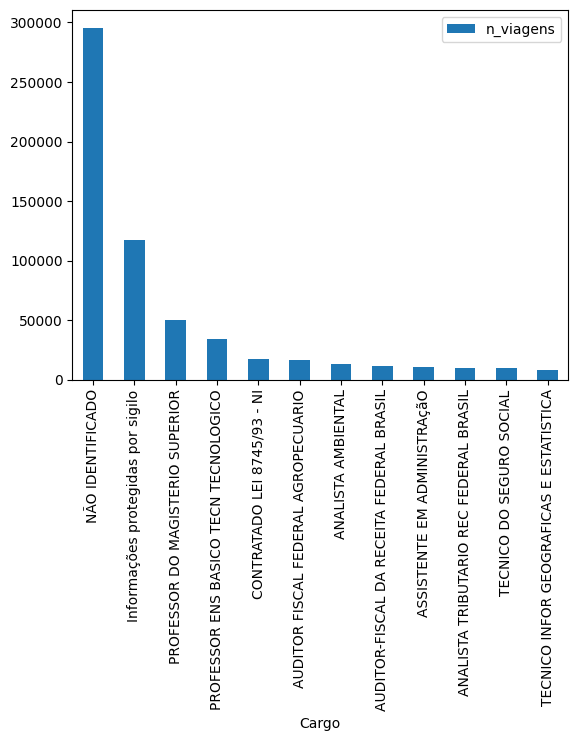

In [ ]:
df_final.plot(x = 'Cargo', y = 'n_viagens', kind= 'bar')

In [ ]:
import matplotlib.pyplot as plt

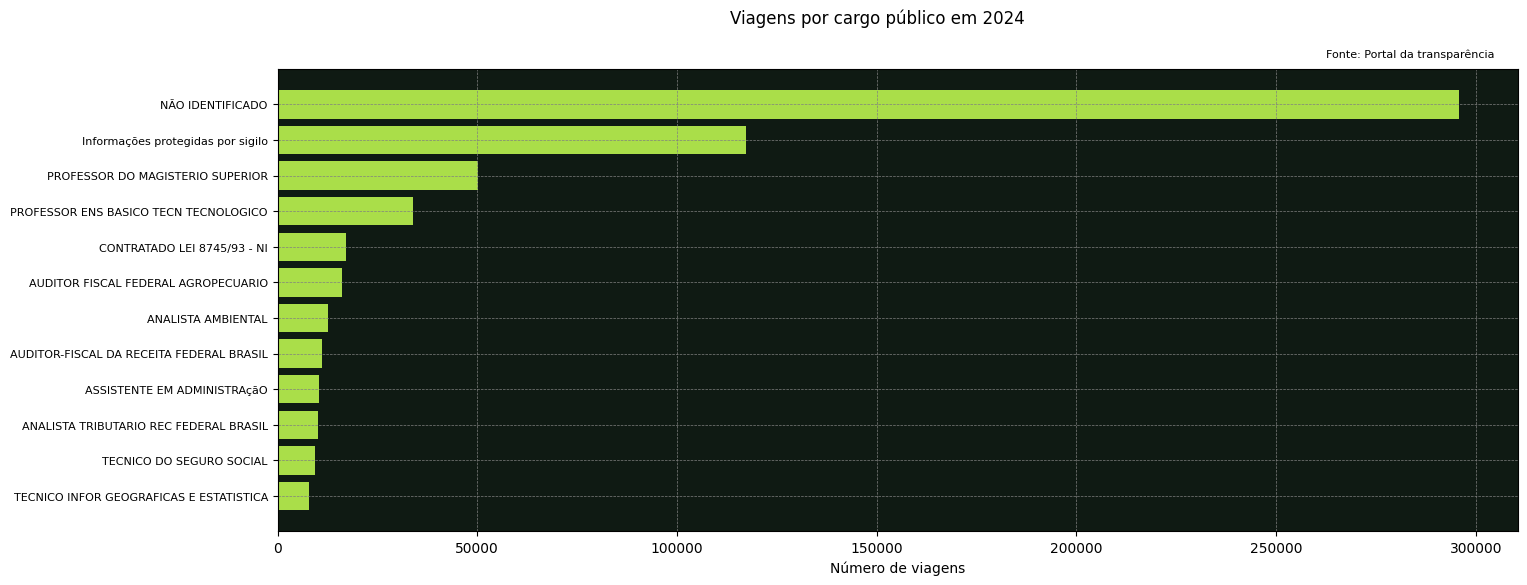

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))

ax.barh(df_final['Cargo'],df_final['n_viagens'], color = "#aade49")
ax.invert_yaxis()
ax.set_facecolor("#0f1a13")

fig.suptitle('Viagens por cargo público em 2024')

plt.figtext(0.78, 0.90, 'Fonte: Portal da transparência', fontsize = 8)

plt.grid(color = 'gray', linestyle = '--', linewidth = '0.5')
plt.yticks(fontsize = 8)

plt.xlabel('Número de viagens')

plt.show()


In [ ]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Mês da viagem,Dias de viagem,Despesas
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,Instituto Federal do Acre,***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,February,2,929.18
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,January,8,21068.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773085,2024001906,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.759.868-**,PAULO PICCHETTI,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-18,2024-12-19,Sem informação,Cumprir agenda de trabalho em Brasília.,1109.09,3180.06,0.00,0.00,December,1,4289.15
773086,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,December,0,262.05
773087,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,December,1,5248.78
773088,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,December,2,5562.82


## **Realizando uma análise exploratória**

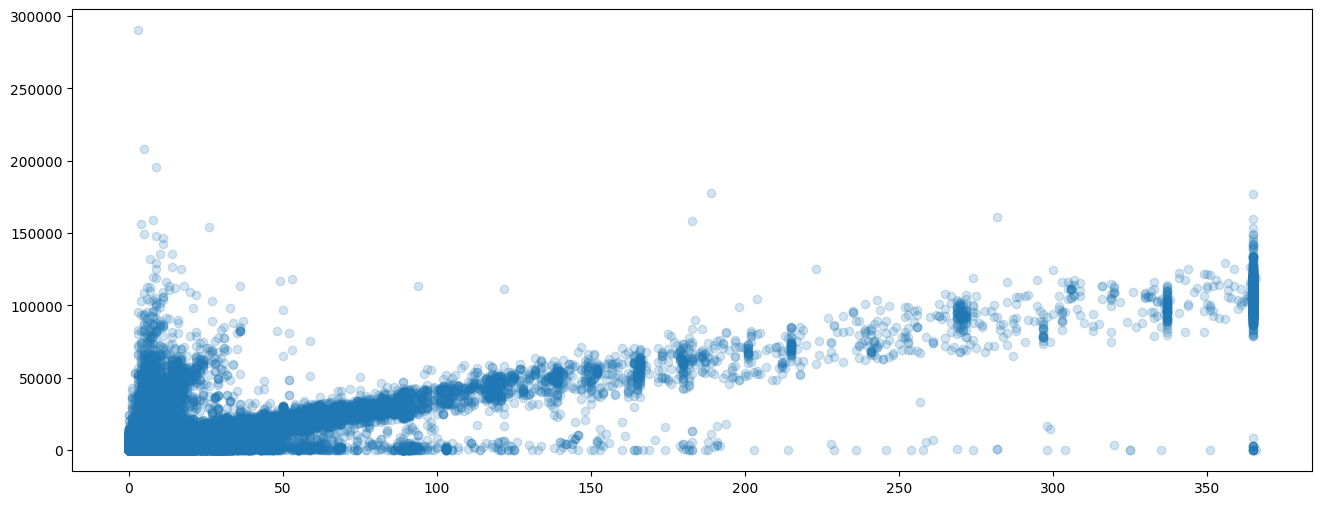

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))

ax.scatter(df_viagens['Dias de viagem'], df_viagens['Despesas'], alpha = 0.2)
#ax.set_xlim(0, 100) Verificando viagens de até 100 dias com valores até 25mil
#ax.set_ylim(0, 25_000)

## **Nota-se que houve viagens num período muito curto com valores muito acima da média. Vamos analisar!**

In [ ]:
(df_viagens['Despesas'] > 180_000).value_counts()

,count
Despesas,
False,773087
True,3


In [ ]:
filtro = df_viagens['Despesas'] > 180_000
df_viagens[filtro]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Mês da viagem,Dias de viagem,Despesas
239430,19961140,010529/24-1C,Realizada,SIM,Conforme Nota Técnica em anexo.,22000,Ministério da Agricultura e Pecuária,22000,Ministério da Agricultura e Pecuária - Unidade...,***.693.051-**,IRAJA REZENDE DE LACERDA,NÃO IDENTIFICADO,CCX-0118,CCX-0118,2024-05-24,2024-06-02,"Xangai/China, Shenzhen/China",Participar de reuniões e encontro governamenta...,14281.65,180718.90,0.00,860.85,May,9,195861.40
261976,19989596,014282/24,Não realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.639.875-**,OLGA MARIA SILVA EMBIRUCU,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,-1,Sem informação,2024-06-12,2024-06-15,Rio de Janeiro/RJ,Foco na identificação das soluções tecnológica...,0.00,290096.16,0.00,0.00,June,3,290096.16
356900,20109417,001426/24-2C,Realizada,SIM,Ajuste de dados.,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.050.944-**,CELSO LUIZ NUNES AMORIM,NÃO IDENTIFICADO,CCX-0118,CCX-0118,2024-07-16,2024-07-21,Washington/Estados Unidos da América,Encontro com autoridades dos Estados Unidos da...,7675.59,199689.55,0.00,532.33,July,5,207897.47


## **Subindo a planilha dos dados de passagens**

In [ ]:
caminho_dados_passagens = "/content/drive/MyDrive/Colab Notebooks/AD/2024_Passagem.csv"

df_passagens = pd.read_csv(caminho_dados_passagens, encoding="Windows-1252", sep=";", decimal=",")
df_passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,19177818,000001/24-1C,Aéreo,Brasil,Distrito Federal,Brasília,França,NaN,Paris,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6871.34,6.60,19/09/2023,18:53
1,19177818,000001/24-1C,Aéreo,França,NaN,Paris,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7.77,6.60,19/09/2023,18:53
2,19220977,000001/24-1C,Aéreo,Brasil,Paraná,Curitiba,Portugal,NaN,Porto,Portugal,NaN,Porto,Brasil,Paraná,Curitiba,8596.69,0.00,31/08/2023,14:49
3,19255612,000002/24,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:40
4,19255728,000001/24,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391484,2024001912,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2196.85,0.00,NaN,00:00
391485,2024001946,Sem informaçã,Aéreo,Brasil,Rio Grande do Sul,Passo Fundo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3530.40,0.00,NaN,00:00
391486,2024001946,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Rio Grande do Sul,Santo Ângelo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2032.42,0.00,NaN,00:00
391487,2024001948,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1715.77,0.00,NaN,00:00


### **Analisando um cenário específico**

In [ ]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 19989596]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
151437,19989596,014282/24,Aéreo,Brasil,São Paulo,Campinas,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,288949.19,0.00,20/05/2024,14:46
151438,19989596,014282/24,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Brasil,Bahia,Salvador,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1146.97,0.00,20/05/2024,14:47


## **Fazendo a junção das tabelas**

In [ ]:
import pandas as pd
import re

# Carregar os dados (substitua pelo seu arquivo)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AD/2024_Passagem.csv", encoding="Windows-1252", sep=";", decimal=",")

# Função para remover caracteres inválidos
def remove_invalid_chars(text):
    if isinstance(text, str):
        return re.sub(r'[\x00-\x1F]', '', text)  # Remove caracteres de controle ASCII
    return text

# Aplicar a função ao DataFrame inteiro
df = df.applymap(remove_invalid_chars)

# Salvar novamente sem erros
df.to_excel("output.xlsx", engine="openpyxl", index=False)


<ipython-input-50-9e753e924e88>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(remove_invalid_chars)


In [ ]:
df_viagens.merge(df_passagens)

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Mês da viagem,Dias de viagem,Despesas,Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,January,8,21068.69,Aéreo,Brasil,Distrito Federal,Brasília,França,NaN,Paris,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6871.34,6.60,19/09/2023,18:53
1,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,January,8,21068.69,Aéreo,França,NaN,Paris,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7.77,6.60,19/09/2023,18:53
2,19220977,000001/24-1C,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26258,Universidade Tecnológica Federal do Paraná,***.133.960-**,PAULO CICERO FRITZEN,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-01-16,2024-07-28,Porto/Portugal,Devido minha seleção para participar como inve...,0.00,8596.69,0.00,9635.54,January,194,18232.23,Aéreo,Brasil,Paraná,Curitiba,Portugal,NaN,Porto,Portugal,NaN,Porto,Brasil,Paraná,Curitiba,8596.69,0.00,31/08/2023,14:49
3,19255612,000002/24,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52121,Comando do Exército,***.480.087-**,DAVI DEMOCRIS,NÃO IDENTIFICADO,OfSubalter,OfSubalter,2024-01-01,2024-01-03,"Munique/Alemanha, Rio de Janeiro/RJ",Movimentação de militar por término de missão ...,0.00,4625.13,0.00,1283.76,January,2,5908.89,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:40
4,19255728,000001/24,Realizada,NÃO,Sem informação,52000,Ministério da Defesa,52121,Comando do Exército,NaN,RENATA RAMOS JUSTINIANO,NÃO IDENTIFICADO,-1,Sem informação,2024-01-01,2024-01-03,"Munique/Alemanha, Rio de Janeiro/RJ","DEPENDENTE (Esposa) do Cap Com DAVI DEMOCRIS, ...",0.00,4625.13,0.00,0.00,January,2,4625.13,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391488,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,-1,Sem informação,-1,Sem informação,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,December,1,5248.78,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2196

In [ ]:
caminho_saida = '/content/drive/MyDrive/Colab Notebooks/AD/tabela.xlsx'


In [ ]:
df_final.to_excel(caminho_saida)